# Fixed Point Iteration: solving  $x = cos(x)$

In [1]:
import math

In [2]:
xHist = []
itMax = 10000
eps = 1.0e-14
lhs = lambda x: math.cos(x)
x = 0.0
xHist.append(x)
for i in range(1, itMax + 1):
    x = math.cos(x)
    xHist.append(x)
    if abs(lhs(x) - x) < eps:
        break
print('ans = ', x)
print('abs(error) = ', abs(lhs(x) - x))
print('# iteration = ', i)

ans =  0.7390851332151657
abs(error) =  8.43769498715119e-15
# iteration =  81


## Rate of Convergence $$ q\approx\frac{\log{|\frac{x_{n+1}-x_{n}}{x_{n}-x_{n-1}}|}}{\log{|\frac{x_{n}-x_{n-1}}{x_{n-1}-x_{n-2}}|}} $$

https://en.wikipedia.org/wiki/Rate_of_convergence

In [3]:
convergenceRate = []
for i in range(3, len(xHist)):
    top = math.log(abs( (xHist[i] - xHist[i-1]) / (xHist[i-1] - xHist[i-2]) ))
    bot = math.log(abs( (xHist[i-1] - xHist[i-2]) / (xHist[i-2] - xHist[i-3]) )) 
    convergenceRate.append(top/bot)

In [4]:
convergenceRate[-1]

1.007845821052661

#### Rate of convergence for the fixed-point iteration is linear

### Speed test

In [5]:
def timeTest():
    itMax = 10000
    eps = 1.0e-14
    lhs = lambda x: math.cos(x)
    x = 0.0
    for i in range(1, itMax + 1):
        x = math.cos(x)
        if abs(lhs(x) - x) < eps:
            break
    ans = x

In [6]:
%%timeit -n 10
timeTest()

10 loops, best of 3: 44.3 µs per loop


In [7]:
from scipy import optimize

In [8]:
ans_scipy = optimize.fixed_point(lhs,0, method = 'iteration', xtol = 1.0e-14)

In [9]:
ans_scipy

0.7390851332151629

In [10]:
x - ans_scipy

2.7755575615628914e-15

In [11]:
math.cos(ans_scipy) - ans_scipy

-3.774758283725532e-15

In [12]:
from scipy.optimize import fixed_point

In [13]:
def timeTest2():
    ans_scipy = fixed_point(lhs,0, method = 'iteration', xtol = 1.0e-14)

In [14]:
%%timeit -n 10
timeTest2()

10 loops, best of 3: 7.25 ms per loop


In [15]:
def timeTest3():
    ans_scipy = fixed_point(lhs,0, method = "del2", xtol = 1.0e-14)

In [16]:
%%timeit -n 10
timeTest3()

10 loops, best of 3: 926 µs per loop


# Fixed-point: Diverge case

In [17]:
lhs = lambda x: 3*math.exp(-x)-1
itMax = 10000
eps = 1.0e-14
x = 0.0
for i in range(1, itMax + 1):
    x = math.cos(x)
    if abs(lhs(x) - x) < eps:
        break
print('ans = ', x)
print('abs(error) = ', abs(lhs(x) - x))
print('# iteration = ', i)

ans =  0.7390851332151607
abs(error) =  0.3064333004445714
# iteration =  10000


In [18]:
import sys
try:
    ans_scipy = optimize.fixed_point(lhs,0, method = 'iteration', xtol = 1.0e-14, maxiter = 1000)
except Exception as e:
    print(e)
    print(sys.exc_info()[0])

Failed to converge after 1000 iterations, value is -0.9976107420074617
<class 'RuntimeError'>


# Redo using:&nbsp;  <font color=#000066 face="courier new"> nympy.optimize.fsolve </font>

In [19]:
import numpy as np

In [20]:
f = lambda x: np.cos(x) - x

In [21]:
import scipy

In [22]:
scipy.optimize.fsolve(f, 0)

array([ 0.73908513])

# Multiple Answer: &nbsp; $sin(x) = cos(x)$
Trick: run the code multiple times, with array of initial guess

In [23]:
f = lambda x: np.sin(x) - np.cos(x)

In [24]:
scipy.optimize.fsolve(f,np.arange(-10,10,0.5))

array([  -2.35619449,   -8.6393798 ,   -8.6393798 ,   -8.6393798 ,
         -8.6393798 ,   -8.6393798 ,   -8.6393798 ,   -5.49778714,
         -5.49778714,   -5.49778714,   -5.49778714,   -5.49778714,
        -27.48893572,   -2.35619449,   -2.35619449,   -2.35619449,
         -2.35619449,   -2.35619449,  -11.78097245,    0.78539816,
          0.78539816,    0.78539816,    0.78539816,    0.78539816,
          0.78539816,   13.35176878,    3.92699082,    3.92699082,
          3.92699082,    3.92699082,    3.92699082,  522.28977866,
          7.06858347,    7.06858347,    7.06858347,    7.06858347,
          7.06858347,    0.78539816,   10.21017612,   10.21017612])

In [25]:
rhs = lambda x: np.arcsin(np.cos(x))  #arcsin just gives 1 value
scipy.optimize.fixed_point(rhs,np.arange(-10,10,0.5))

array([ 0.78539816,  0.78539816,  0.78539816,  0.78539816,  0.78539816,
        0.78539816,  0.78539816,  0.78539816,  0.78539816,  0.78539816,
        0.78539816,  0.78539816,  0.78539816,  0.78539816,  0.78539816,
        0.78539816,  0.78539816,  0.78539816,  0.78539816,  0.78539816,
        0.78539816,  0.78539816,  0.78539816,  0.78539816,  0.78539816,
        0.78539816,  0.78539816,  0.78539816,  0.78539816,  0.78539816,
        0.78539816,  0.78539816,  0.78539816,  0.78539816,  0.78539816,
        0.78539816,  0.78539816,  0.78539816,  0.78539816,  0.78539816])

In [26]:
rhs = lambda x: np.cos(x) - np.sin(x) + x
scipy_ans = scipy.optimize.fixed_point(rhs,np.arange(-10,10,0.5), method='iteration')
scipy_ans

array([-11.78097245, -11.78097245, -11.78097245,  -5.49778714,
        -5.49778714,  -5.49778714,  -5.49778714,  -5.49778714,
        -5.49778714,  -5.49778714,  -5.49778714,  -5.49778714,
        -5.49778714,  -5.49778714,  -5.49778714,  -5.49778715,
         0.78539816,   0.78539816,   0.78539816,   0.78539816,
         0.78539816,   0.78539816,   0.78539816,   0.78539816,
         0.78539816,   0.78539816,   0.78539816,   0.78539817,
         7.06858346,   7.06858347,   7.06858347,   7.06858347,
         7.06858347,   7.06858347,   7.06858347,   7.06858347,
         7.06858347,   7.06858347,   7.06858347,   7.06858347])

In [27]:
scipy_ans.shape

(40,)

In [28]:
for i,x0 in enumerate(np.arange(-10,10,0.5)):
    ans = scipy.optimize.fixed_point(rhs, x0)
    print("{:.8f}  ".format(float(ans)),end='')
    if (i+1)%5 == 0:
        print('\n',end='')

-11.78097245  -5.49778714  -8.63937980  -8.63937980  -8.63937980  
-2.35619449  -5.49778714  -5.49778714  -5.49778714  -5.49778714  
-5.49778714  -5.49778714  -5.49778714  -8.63937980  -2.35619449  
-2.35619449  -2.35619449  -5.49778714  0.78539816  0.78539816  
0.78539816  0.78539816  0.78539816  0.78539816  0.78539816  
0.78539816  13.35176878  3.92699082  3.92699082  3.92699082  
13.35176878  7.06858347  7.06858347  7.06858347  7.06858347  
7.06858347  7.06858347  7.06858347  7.06858347  25.91813939  


In [29]:
def fixPoint(rhs,x):
    itMax = 10000
    eps = 1.0e-14
    for i in range(1, itMax + 1):
        x = rhs(x)
        if abs(rhs(x) - x) < eps:
            break
    return (x)

In [30]:
for i,x0 in enumerate(np.arange(-10,10,0.5)):
    ans = fixPoint(rhs, x0)
    print("{:.8f}  ".format(float(ans)),end='')
    if (i+1)%5 == 0:
        print('\n',end='')

-11.78097245  -11.78097245  -11.78097245  -5.49778714  -5.49778714  
-5.49778714  -5.49778714  -5.49778714  -5.49778714  -5.49778714  
-5.49778714  -5.49778714  -5.49778714  -5.49778714  -5.49778714  
-5.49778714  0.78539816  0.78539816  0.78539816  0.78539816  
0.78539816  0.78539816  0.78539816  0.78539816  0.78539816  
0.78539816  0.78539816  0.78539816  7.06858347  7.06858347  
7.06858347  7.06858347  7.06858347  7.06858347  7.06858347  
7.06858347  7.06858347  7.06858347  7.06858347  7.06858347  


In [31]:
rhs = lambda x: np.cos(x) - np.sin(x) + x

In [32]:
ans_user =[fixPoint(rhs,x) for x in np.arange(-10,10,0.5)]
ans_user

[-11.780972450961718,
 -11.78097245096172,
 -11.78097245096172,
 -5.4977871437821335,
 -5.4977871437821415,
 -5.4977871437821353,
 -5.4977871437821344,
 -5.4977871437821353,
 -5.4977871437821451,
 -5.4977871437821353,
 -5.4977871437821415,
 -5.4977871437821415,
 -5.4977871437821415,
 -5.4977871437821415,
 -5.4977871437821344,
 -5.4977871437821353,
 0.78539816339744417,
 0.78539816339744395,
 0.78539816339744228,
 0.78539816339745516,
 0.78539816339745183,
 0.78539816339744384,
 0.78539816339745183,
 0.78539816339744484,
 0.78539816339745283,
 0.78539816339745316,
 0.78539816339745483,
 0.78539816339744506,
 7.0685834705770381,
 7.0685834705770283,
 7.0685834705770381,
 7.0685834705770407,
 7.0685834705770283,
 7.0685834705770381,
 7.0685834705770283,
 7.0685834705770407,
 7.0685834705770318,
 7.0685834705770381,
 7.0685834705770318,
 7.068583470577031]

In [33]:
y_sol = np.zeros(len(ans_user))

In [34]:
x = np.arange(-15,15,0.5)
y = [math.cos(i) - math.sin(i) for i in x]

In [35]:
import matplotlib.pyplot as plt

In [36]:
import matplotlib as mpl

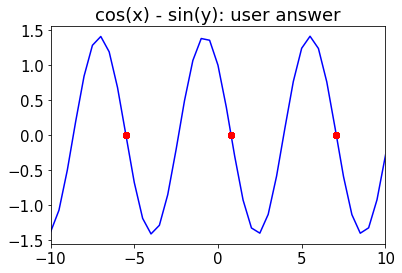

In [37]:
font = {'size': 15}
mpl.rc('font', **font)
plt.figure()
plt.plot(x,y,'-b')
plt.plot(ans_user,y_sol,'or')
plt.xlim(-10,10)
plt.title("cos(x) - sin(y): user answer")
plt.show()

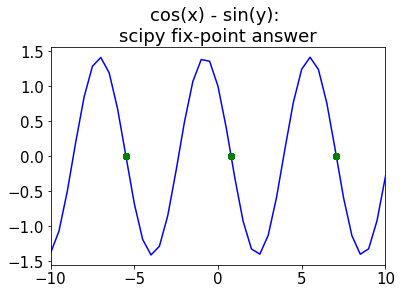

In [38]:
plt.figure()
plt.plot(x,y,'-b')
plt.plot(scipy_ans,y_sol,'og')
plt.xlim(-10,10)
plt.title("cos(x) - sin(y): \nscipy fix-point answer")
plt.show()

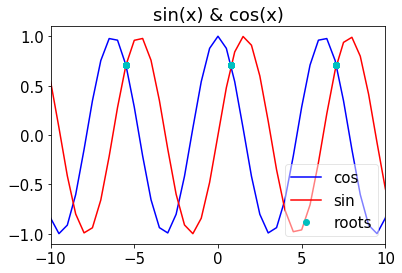

In [39]:
plt.figure()
plt.plot(x,np.cos(x),'-b', label = 'cos')
plt.plot(x,np.sin(x),'-r', label = 'sin')
plt.plot(ans_user,np.sin(ans_user),'oc', label = 'roots')
plt.xlim(-10,10)
plt.legend(loc = 4, framealpha = 0.5)
plt.title("sin(x) & cos(x)")
plt.show()

# Bisection Method

In [40]:
fx = lambda x: math.sin(x) - math.cos(x)
L = 0
R = 1
eps = 1e-14
maxIteration = 1000
xHist = []
for i in range(0, maxIteration):
    M = 0.5 * (L+R)
    xHist.append(M)
    fL = fx(L)
    fR = fx(R)
    fM = fx(M)
    if abs(fL) < eps:
        ans = L
        break
    if abs(fR) < eps:
        ans = R
        break
    if abs(fM) < eps:
        ans = M
        break
    if ((fL > 0) and (fM < 0)) or ((fL < 0) and (fM > 0)):
        R = M
    elif ((fR > 0) and (fM < 0)) or ((fR < 0) and (fM > 0)):
        L = M
    else:
        print('no answer in the given domain')
        break
    if abs(fM) < eps:
        ans = M
        break
print('ans = ', ans)
print('number of iteration = ', i)
print('error = ', fM)

ans =  0.7853981633974456
number of iteration =  44
error =  -3.885780586188048e-15


In [41]:
convergenceRate = []
for i in range(3, len(xHist)):
    top = math.log(abs( (xHist[i] - xHist[i-1]) / (xHist[i-1] - xHist[i-2]) ))
    bot = math.log(abs( (xHist[i-1] - xHist[i-2]) / (xHist[i-2] - xHist[i-3]) )) 
    convergenceRate.append(top/bot)

In [42]:
convergenceRate

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [43]:
scipy.optimize.bisect(fx,0,1)

0.7853981633979856

In [44]:
def myBisec(fx, L, R, eps = 1e-14, maxIteration = 1000):
    xHist = []
    for i in range(0, maxIteration):
        M = 0.5 * (L+R)
        xHist.append(M)
        fL = fx(L)
        fR = fx(R)
        fM = fx(M)
        if abs(fL) < eps:
            ans = L
            break
        if abs(fR) < eps:
            ans = R
            break
        if abs(fM) < eps:
            ans = M
            break
        if ((fL > 0) and (fM < 0)) or ((fL < 0) and (fM > 0)):
            R = M
        elif ((fR > 0) and (fM < 0)) or ((fR < 0) and (fM > 0)):
            L = M
        else:
            print('no answer in the given domain')
            break
        if abs(fM) < eps:
            ans = M
            break
    print('ans = ', ans)
    print('number of iteration = ', i)
    print('error = ', fM)
    convergenceRate = []
    for i in range(3, len(xHist)):
        top = math.log(abs( (xHist[i] - xHist[i-1]) / (xHist[i-1] - xHist[i-2]) ))
        bot = math.log(abs( (xHist[i-1] - xHist[i-2]) / (xHist[i-2] - xHist[i-3]) )) 
        convergenceRate.append(top/bot)
    print('convergence rate = ', np.mean(convergenceRate))

In [45]:
myBisec(fx,0,1)

ans =  0.7853981633974456
number of iteration =  44
error =  -3.885780586188048e-15
convergence rate =  1.0


In [46]:
%timeit -n 10 scipy.optimize.bisect(fx,0,1)

10 loops, best of 3: 22.9 µs per loop


In [47]:
%timeit -n 10 myBisec(fx,0,1)

ans =  0.7853981633974456
number of iteration =  44
error =  -3.885780586188048e-15
convergence rate =  1.0
ans =  0.7853981633974456
number of iteration =  44
error =  -3.885780586188048e-15
convergence rate =  1.0
ans =  0.7853981633974456
number of iteration =  44
error =  -3.885780586188048e-15
convergence rate =  1.0
ans =  0.7853981633974456
number of iteration =  44
error =  -3.885780586188048e-15
convergence rate =  1.0
ans =  0.7853981633974456
number of iteration =  44
error =  -3.885780586188048e-15
convergence rate =  1.0
ans =  0.7853981633974456
number of iteration =  44
error =  -3.885780586188048e-15
convergence rate =  1.0
ans =  0.7853981633974456
number of iteration =  44
error =  -3.885780586188048e-15
convergence rate =  1.0
ans =  0.7853981633974456
number of iteration =  44
error =  -3.885780586188048e-15
convergence rate =  1.0
ans =  0.7853981633974456
number of iteration =  44
error =  -3.885780586188048e-15
convergence rate =  1.0
ans =  0.7853981633974456
nu

In [48]:
def myBisecPlain(fx, L, R, eps = 1e-14, maxIteration = 1000):
    for i in range(0, maxIteration):
        M = 0.5 * (L+R)
        fL = fx(L)
        fR = fx(R)
        fM = fx(M)
        if ((fL > 0) and (fM < 0)) or ((fL < 0) and (fM > 0)):
            R = M
        else:
            L = M
        if abs(fM) < eps:
            ans = M
            break
    return(ans)

In [49]:
%timeit -n 10 myBisecPlain(fx,0,1)

10 loops, best of 3: 74.3 µs per loop


In [50]:
myBisecPlain(fx,0,1)

0.7853981633974456

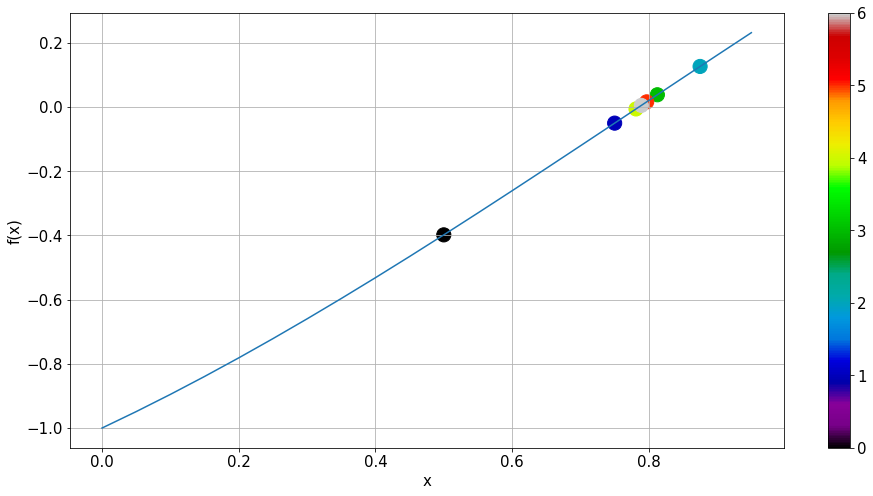

In [51]:
plt.figure(figsize = (16,8))
fx = lambda x: np.sin(x) - np.cos(x)
x = np.arange(0,1,0.05).tolist()
y = fx(x)
x2 = xHist[0:7]
y2 = fx(x2)
z = [i for i,j in enumerate(x2)]
plt.plot(x, y)
t = np.arange(0,100)
plt.scatter(x2, y2, s = 200,  c = z, cmap = mpl.cm.nipy_spectral)
plt.colorbar()
plt.grid()
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

In [52]:
math.log(10)

2.302585092994046

In [53]:
np.log(10)

2.3025850929940459

In [54]:
np.log10(10)

1.0

In [55]:
math.log10(10)

1.0

In [56]:
def fx2(x, Re = 1e5, D = 0.052, ep = 150.0e-6 ):
    return 1/x**0.5 + 4 * math.log10(ep/D/3.7 + 1.256 / Re / x**0.5)

In [57]:
myBisec(fx2,1e-15,1)

ans =  0.006804747000108033
number of iteration =  55
error =  0.0
convergence rate =  1.0


In [58]:
fx2(0.006490259249563085)

0.2970090692492473

## Many Inputs via:&nbsp;  <font color=#000066 face="courier new">  **keyward argument
Additional reading / Reference
<br>http://book.pythontips.com/en/latest/args_and_kwargs.html
<br>https://www.saltycrane.com/blog/2008/01/how-to-use-args-and-kwargs-in-python/

In [59]:
def fTest1(fn,**kw):
    print(fn(**kw))

In [60]:
fTest1(fx2, x = 0.006, Re = 4000, ep = 500e-6)

4.2018775357632645


In [61]:
fx2(x = 0.006, Re = 4000, ep = 500e-6)

4.2018775357632645

In [62]:
def myBisecManyInput(fx, L, R, eps = 1e-14, maxIteration = 1000,**kw):
    xHist = []
    for i in range(0, maxIteration):
        M = 0.5 * (L+R)
        xHist.append(M)
        fL = fx(L,**kw)
        fR = fx(R,**kw)
        fM = fx(M,**kw)
        if abs(fL) < eps:
            ans = L
            break
        if abs(fR) < eps:
            ans = R
            break
        if abs(fM) < eps:
            ans = M
            break
        if ((fL > 0) and (fM < 0)) or ((fL < 0) and (fM > 0)):
            R = M
        elif ((fR > 0) and (fM < 0)) or ((fR < 0) and (fM > 0)):
            L = M
        else:
            print('no answer in the given domain')
            break
        if abs(fM) < eps:
            ans = M
            break
    print('ans = ', ans)
    print('number of iteration = ', i)
    print('error = ', fM)
    convergenceRate = []
    for i in range(3, len(xHist)):
        top = math.log(abs( (xHist[i] - xHist[i-1]) / (xHist[i-1] - xHist[i-2]) ))
        bot = math.log(abs( (xHist[i-1] - xHist[i-2]) / (xHist[i-2] - xHist[i-3]) )) 
        convergenceRate.append(top/bot)
    print('convergence rate = ', np.mean(convergenceRate))
    return ans

In [63]:
myBisecManyInput(fx2, 1e-10,1, D = 0.2, Re = 1e6)

ans =  0.004677270644027344
number of iteration =  51
error =  -7.105427357601002e-15
convergence rate =  1.0


0.004677270644027344

In [64]:
_

0.004677270644027344

In [65]:
fx2(_,D = 0.2, Re = 1e6)

-7.105427357601002e-15

In [66]:
scipy.optimize.bisect(fx2, 1e-10, 1, args = (1e6, 0.2, 150.0e-6 ), xtol=1e-14)

0.004677270644030232

In [67]:
fx2(_ ,1e6, 0.2, 150.0e-6)

-4.565237077258644e-12

# Newton-Raphson Method

In [68]:
def fx2(x, Re = 1e5, D = 0.052, ep = 150.0e-6 ):
    return 1/x**0.5 + 4 * math.log10(ep/D/3.7 + 1.256 / Re / x**0.5)

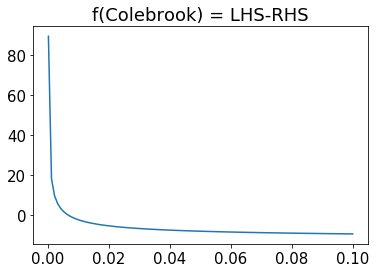

In [69]:
plt.figure()
x = np.linspace(0.0001,0.1, 100).tolist()
y = list(map(fx2,x))
plt.plot(x,y)
plt.title("f(Colebrook) = LHS-RHS")
plt.show()

In [70]:
def myNewton(fx, args = [], eps = 1e-10, x0 = 1e-9, maxIt = 1000):
    for i in range(0,maxIt):
        xOld = x0
        slope = (fx(x0 + 0.5 * eps, *args) - fx(x0 - 0.5 * eps, *args))/eps
        fxVal = fx(x0, *args)
        try:
            x0 = x0 - fxVal / slope    
        except Exception as e:
            print(e)
            print(sys.exc_info()[0])
            print('slope = ', slope)
        
        if abs(x0 - xOld) < eps:
            print('#iteration = ', i)
            print('ans = ', x0)
            print('error = ', fx(x0, *args))
            return x0
    print('cannot find answer')
    print('#iteration = ', i)
    print('ans = ', x0)
    return x0

In [71]:
myNewton(fx2, args = [1e6, 0.2, 150.0e-6 ])

#iteration =  19
ans =  0.004677270644027339
error =  1.7763568394002505e-15


0.004677270644027339

In [72]:
myNewton(fx2, x0 = 1e-9, args = [1e6, 0.2, 150.0e-6 ])

#iteration =  19
ans =  0.004677270644027339
error =  1.7763568394002505e-15


0.004677270644027339

In [73]:
args = [1e6, 0.2, 150.0e-6 ]

In [74]:
fx2(_, *args)

1.7763568394002505e-15

In [75]:
scipy.optimize.newton(fx2, 1e-9, args = tuple(args), tol = 1e-15)

0.004677270644027339

In [76]:
fx2(_, *args)

1.7763568394002505e-15

In [77]:
def myNewtonPlain(fx, args = [], eps = 1e-10, x0 = 1e-9, maxIt = 1000):
    for i in range(0,maxIt):
        xOld = x0
        slope = (fx(x0 + 0.5 * eps, *args) - fx(x0 - 0.5 * eps, *args))/eps
        fxVal = fx(x0, *args)
        try:
            x0 = x0 - fxVal / slope
        except Exception as e:
            print(e)
            print(sys.exc_info()[0])
            print('slope = ', slope)
        
        if abs(x0 - xOld) < eps:
            return x0
    print('cannot find answer')
    print('#iteration = ', i)
    print('ans = ', x0)
    return x0

In [78]:
%%timeit -n 10
myNewtonPlain(fx2, args = [1e6, 0.2, 150.0e-6 ])

10 loops, best of 3: 218 µs per loop


In [79]:
%%timeit -n 10
scipy.optimize.newton(fx2, 1e-9, args = tuple(args), tol = 1e-15)

10 loops, best of 3: 30 µs per loop


# Class with root finding method

In [80]:
class RootFindClass:
    def __init__(self, fx, x0 = 1, LLim = -1000, RLim = 1000, xTol = 1e-14, maxIt = 1000, args = ()):
        self.x0 = x0
        self.LLim = LLim
        self.RLim = RLim
        self.xTol = xTol
        self.maxIt = maxIt
        self.args = args
        self.fx = fx
    def fix_point(self):
        self.RHS = lambda x: self.fx(x) + x
        return scipy.optimize.fixed_point(self.RHS, self.x0, xtol = self.xTol, args = self.args)
    def bisect(self):
        return scipy.optimize.bisect(self.fx, self.LLim, self.RLim, xtol = self.xTol, args = self.args)
    def newton(self):
        return scipy.optimize.newton(self.fx, self.x0, tol = self.xTol, args = self.args)
    #operator overloading for + operation
    def __add__(self, other):
        return RootFindClass(lambda x: self.fx(x) + other.fx(x), self.x0, 
                            self.LLim, self.RLim, self.xTol, self.maxIt, self.args + other.args)

In [81]:
f1 = lambda x: math.cos(x) - x
func_1 = RootFindClass(f1, 1, 0, 2)

def print_f1():
    sp_output = scipy.optimize.fixed_point(lambda x: f1(x) + x, 1, xtol = 1e-14)
    user_output = func_1.fix_point()
    print('fixed-point')
    print('scipy output = ', sp_output)
    print(' user output = ', user_output, end = '\n\n')

    sp_output = scipy.optimize.bisect(f1, 0, 2, xtol = 1e-14)
    user_output = func_1.bisect()
    print('bisection')
    print('scipy output = ', sp_output)
    print(' user output = ', user_output, end = '\n\n')

    sp_output = scipy.optimize.newton(f1, 1, tol = 1e-14)
    user_output = func_1.newton()
    print('Newton')
    print('scipy output = ', sp_output)
    print(' user output = ', user_output, end = '\n\n')

print_f1()

fixed-point
scipy output =  0.7390851332151607
 user output =  0.7390851332151607

bisection
scipy output =  0.7390851332151627
 user output =  0.7390851332151627

Newton
scipy output =  0.7390851332151607
 user output =  0.7390851332151607



In [82]:
def f1(x, Re = 1e5, D = 0.052, ep = 150.0e-6 ):
    return 1/x**0.5 + 4 * math.log10(ep/D/3.7 + 1.256 / Re / x**0.5)

func_1 = RootFindClass(f1, 1e-9, 1e-10, 1, args = (1e6, 0.2, 150e-6))

sp_output = scipy.optimize.bisect(f1, 1e-10, 1, xtol = 1e-14, args = (1e6, 0.2, 150e-6))
user_output = func_1.bisect()
print('bisection')
print('scipy output = ', sp_output)
print(' user output = ', user_output, end = '\n\n')

sp_output = scipy.optimize.newton(f1, 1e-9, tol = 1e-14, args = (1e6, 0.2, 150e-6))
user_output = func_1.newton()
print('Newton')
print('scipy output = ', sp_output)
print(' user output = ', user_output, end = '\n\n')

bisection
scipy output =  0.004677270644030232
 user output =  0.004677270644030232

Newton
scipy output =  0.00467727064402734
 user output =  0.00467727064402734



In [83]:
f1 = lambda x: math.cos(x) - math.sin(x)
func_1 = RootFindClass(f1, 1, 0, 2)

print_f1()

fixed-point
scipy output =  0.7853981633974483
 user output =  0.7853981633974483

bisection
scipy output =  0.7853981633974527
 user output =  0.7853981633974527

Newton
scipy output =  0.7853981633974483
 user output =  0.7853981633974483



In [84]:
func_a = RootFindClass(math.sin, 1, 0, 2)
func_b = RootFindClass(lambda x: -math.cos(x), 1, 0, 2)

func_1 = func_a + func_b
print_f1()

fixed-point
scipy output =  0.7853981633974483
 user output =  0.7853981633974481

bisection
scipy output =  0.7853981633974527
 user output =  0.7853981633974527

Newton
scipy output =  0.7853981633974483
 user output =  0.7853981633974483



In [85]:
func_1.newton()

0.7853981633974483

# Solving polynomial: &nbsp; <font color=#000066 face="courier new">  $x^2 - 7 = 0$ </font>
numpy.roots
pass range of initial guess and solve with scipy

In [86]:
ans = np.roots([1,0,-7])
ans

array([-2.64575131,  2.64575131])

In [87]:
ans[0] ** 2 

7.0000000000000009

In [88]:
ans[1] ** 2 

6.9999999999999982

In [89]:
fx = lambda x: x**2 -7

In [90]:
scipy.optimize.fsolve(fx, [-5,0,5])

array([-2.64575131, -2.64575131,  2.64575131])

### Truncate then use set to get unique answer

In [91]:
ans = scipy.optimize.fsolve(fx, [-5,0,5])
{float('{0:.10f}'.format(i)) for i in ans}

{-2.6457513111, 2.6457513111}

# Solving Analytically: &nbsp; <font color=#000066 face="courier new">  $x^2 - 7 = 0$ </font>

In [92]:
import sympy as sm

In [93]:
x, y = sm.symbols('x y')

In [94]:
sm.solve(x**2-7)

[-sqrt(7), sqrt(7)]

In [95]:
sm.init_printing(use_unicode=True)

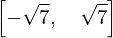

In [96]:
sm.solve(x**2-7)

In [97]:
E1 = x**2 - 7

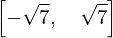

In [98]:
sm.solve(E1)

In [99]:
E2 = x**2 - y

In [100]:
sm.solve(E2,x)

In [101]:
sm.diff(E2,x)

In [102]:
ans = sm.diff(E2,x)

In [103]:
type(ans)

sympy.core.mul.Mul

In [104]:
py_func = sm.lambdify(x, ans)

In [105]:
py_func(2)

In [106]:
type(py_func)

function

In [107]:
f, Re, ep, D = sm.symbols('f Re ep D')

In [108]:
E2 = 1/f**0.5 + 4 * sm.functions.log(ep/D/3.7 + 1.256 / Re / f**0.5, 10)

In [109]:
py_func0 = sm.lambdify(('f=0', 'Re=0', 'D=0', 'ep=0'), E2)

In [110]:
py_func0(Re = 1e5, f = 0.001, D = 0.05, ep = 150e-6)

In [111]:
def fx2(x, Re = 1e5, D = 0.052, ep = 150.0e-6 ):
    return 1/x**0.5 + 4 * math.log10(ep/D/3.7 + 1.256 / Re / x**0.5)

In [112]:
py_func0(0.001, 1e5, 0.05, 150e-6)

In [113]:
fx2(0.001, 1e5, 0.05, 150e-6)

In [114]:
py_func0b = sm.lambdify('f=0, Re=0, D=0, ep=0', E2)

In [115]:
py_func0b(0.001, 1e5, 0.05, 150e-6)

In [116]:
py_func0b(Re = 1e5, f = 0.001, D = 0.05, ep = 150e-6)

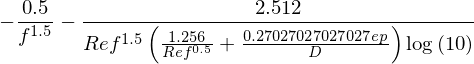

In [117]:
sm.diff(E2, f)

In [118]:
diff_fn = sm.lambdify('f=0, Re=0, D=0, ep=0', sm.diff(E2, f))

In [119]:
diff_fn(Re = 1e5, f = 0.001, D = 0.05, ep = 150e-6)

### Central finite difference won't be exact, but it will be close

In [120]:
( (fx2(0.001+1e-9, 1e5, 0.05, 150e-6) - fx2(0.001-1e-9, 1e5, 0.05, 150e-6))/
2e-9)

In [121]:
(_ - __)/__ * 100

In [122]:
sm.__version__

'1.1.1'

In [123]:
E3 = sm.diff(E2, f)

In [124]:
type(E3)

sympy.core.add.Add

### Substitution and evaluation

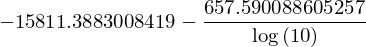

In [125]:
E4 = E3.subs({Re:1e5, f:0.001, D:0.05, ep:150e-6})
E4

In [126]:
E4.evalf()

In [127]:
sm.N(E4)

# Sympy Integration

In [128]:
x, y = sm.symbols('x y')
sm.integrate(x,x)

In [129]:
sm.integrate(sm.log(x), x)

In [130]:
sm.integrate(sm.log(x), x).subs({x:2})

In [131]:
sm.integrate(sm.log(x), x).subs({x:2}).evalf()

In [132]:
sm.integrate(sm.log(x), (x,0,10))

In [133]:
x * sm.log(x)

In [134]:
try:
    ans = 0 * math.log(0)
except Exception as e:
    print(e)
    print(sys.exc_info()[0])

math domain error
<class 'ValueError'>


In [135]:
ans = x * sm.log(x)
ans.subs({x:0})

In [136]:
sm.limit(ans, x, 0)

In [137]:
sm.integrate(sm.log(x), (x,0,1))

In [138]:
sm.integrate(sm.log(x), (x,0,y))

At what y that make $\int_{0}^{y}\log{x}\, dx = 1$

In [139]:
ans2 = sm.integrate(sm.log(x), (x,0,y))
root_ans = scipy.optimize.fsolve(sm.lambdify(y, ans2 - 1),3)[0]
root_ans

In [140]:
root_ans * math.log(root_ans) - root_ans

In [141]:
sm.integrate(sm.log(x), (x,0,root_ans))

# Combine Mpmath and Scipy: Ei function

<br>
<font size = 4.5> Wikipedia & Wolfram:&nbsp;  $\operatorname{Ei}(x)=-\int_{-x}^{\infty}\frac{e^{-t}}t\,dt$
<br> Sympy Library: &nbsp; $\operatorname{Ei}(x)=\int_{-\infty}^{x}\frac{e^{t}}t\,dt$
<br> are they the same? yes <br>
<br> &nbsp;&nbsp;&nbsp;&nbsp; for u = -t
<br> @$t = \infty, u = -\infty$
<br> @$t = -x, u = x$
<br> @$dt = -du$ <br>
<br> $\operatorname{Ei}(x)=-\int_{-x}^{\infty}\frac{e^{-t}}t\,dt 
= -\int_{u = x}^{u = -\infty}\frac{e^{u}}{-u}\,-du$
<br><br> $-\int_{u = x}^{u = -\infty}\frac{e^{u}(-1)}{-u}\,du
= \int_{-\infty}^{x}\frac{e^{u}}{u}\,du
=\int_{-\infty}^{x}\frac{e^{t}}t\,dt$
</font>

In [142]:
import mpmath

In [143]:
mpmath.ei(1)

mpf('1.8951178163559368')

In [144]:
float(mpmath.ei(1))

We may double check the value from <a href ="https://goo.gl/EkWriV">http://www.ams.org</a>

## At what x, Ei(x) = 1.00000

In [145]:
x = np.linspace(0,1,1000)
y = list(map(mpmath.ei,x))

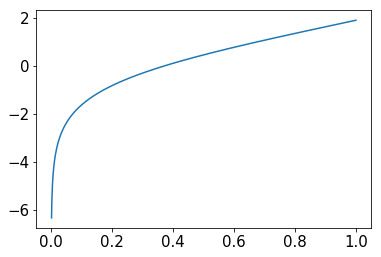

In [146]:
plt.figure()
plt.plot(x,y)
plt.show()

In [147]:
ans = scipy.optimize.bisect(lambda x: float(mpmath.ei(x)) - 1,0.1,0.9,xtol=1e-14)
ans

In [148]:
mpmath.ei(ans)

mpf('1.000000000000002')

In [149]:
ans = scipy.optimize.fsolve(lambda x: float(mpmath.ei(float(x))) - 1,0.9,xtol=1e-14)
ans[0]

In [150]:
try:
    ans = scipy.optimize.fsolve(lambda x: float(mpmath.ei(x)) - 1,0.9,xtol=1e-14)
except Exception as e:
    print(e)
    print(sys.exc_info()[0])

cannot create mpf from array([ 0.9])
<class 'TypeError'>


We previously solve 'TypeError' by forcing the input type to mpmath.ei to be float (not array)